In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [72]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/creditcard.csv')

In [73]:
print(data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [75]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [76]:
print(train_data)

            Time        V1        V2        V3        V4        V5        V6  \
223361  143352.0  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197   
165061  117173.0 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310   
238186  149565.0  0.072509  0.820566 -0.561351 -0.709897  1.080399 -0.359429   
150562   93670.0 -0.535045  1.014587  1.750679  2.769390  0.500089  1.002270   
138452   82655.0 -4.026938  1.897371 -0.429786 -0.029571 -0.855751 -0.480406   
...          ...       ...       ...       ...       ...       ...       ...   
119879   75618.0  1.173488  0.100792  0.490512  0.461596 -0.296377 -0.213165   
259178  159000.0 -0.775981  0.144023 -1.142399 -1.241113  1.940358  3.912076   
131932   79795.0 -0.146609  0.992946  1.524591  0.485774  0.349308 -0.815198   
146867   87931.0 -2.948638  2.354849 -2.521201 -3.798905  1.866302  2.727695   
121958   76381.0  1.233174 -0.784851  0.386784 -0.698559 -1.034018 -0.637028   

              V7        V8        V9  .

In [77]:
print(test_data)

            Time         V1        V2         V3        V4         V5  \
43428    41505.0 -16.526507  8.584972 -18.649853  9.505594 -13.793819   
49906    44261.0   0.339812 -2.743745  -0.134070 -1.385729  -1.451413   
29474    35484.0   1.399590 -0.590701   0.168619 -1.029950  -0.539806   
276481  167123.0  -0.432071  1.647895  -1.669361 -0.349504   0.785785   
278846  168473.0   2.014160 -0.137394  -1.015839  0.327269  -0.182179   
...          ...        ...       ...        ...       ...        ...   
75723    56223.0  -1.994348  1.503076  -0.365560  0.780223  -0.957956   
252263  155726.0  -0.234567  0.733694   0.486250 -0.718186   0.782227   
221246  142491.0   0.040441 -0.109737  -1.266430  1.004783   2.223390   
81910    59157.0  -0.495048  0.991481   1.671584 -0.342474   0.470012   
59490    48864.0  -1.590486  0.992415  -0.512841  1.120752  -1.916756   

              V6         V7        V8        V9  ...       V21       V22  \
43428  -2.832404 -16.701694  7.517344 -8.507059

In [78]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227845 entries, 223361 to 121958
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     22

In [79]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56962 entries, 43428 to 59490
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    56962 non-null  float64
 1   V1      56962 non-null  float64
 2   V2      56962 non-null  float64
 3   V3      56962 non-null  float64
 4   V4      56962 non-null  float64
 5   V5      56962 non-null  float64
 6   V6      56962 non-null  float64
 7   V7      56962 non-null  float64
 8   V8      56962 non-null  float64
 9   V9      56962 non-null  float64
 10  V10     56962 non-null  float64
 11  V11     56962 non-null  float64
 12  V12     56962 non-null  float64
 13  V13     56962 non-null  float64
 14  V14     56962 non-null  float64
 15  V15     56962 non-null  float64
 16  V16     56962 non-null  float64
 17  V17     56962 non-null  float64
 18  V18     56962 non-null  float64
 19  V19     56962 non-null  float64
 20  V20     56962 non-null  float64
 21  V21     56962 non-null  float64
 22 

In [80]:
train_data.to_csv("entrenamiento.csv", index=False)

In [81]:
test_data.to_csv("prueba.csv", index=False)

In [82]:
#Carga de dataset
data = pd.read_csv('/content/entrenamiento.csv')

In [83]:
# Lectura de Datos
X = data.iloc[:, :30]
y = data.iloc[:, 30]
m = y.size

In [84]:
print(X)
print('-'*26)
print(y)

            Time        V1        V2        V3        V4        V5        V6  \
0       143352.0  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197   
1       117173.0 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310   
2       149565.0  0.072509  0.820566 -0.561351 -0.709897  1.080399 -0.359429   
3        93670.0 -0.535045  1.014587  1.750679  2.769390  0.500089  1.002270   
4        82655.0 -4.026938  1.897371 -0.429786 -0.029571 -0.855751 -0.480406   
...          ...       ...       ...       ...       ...       ...       ...   
227840   75618.0  1.173488  0.100792  0.490512  0.461596 -0.296377 -0.213165   
227841  159000.0 -0.775981  0.144023 -1.142399 -1.241113  1.940358  3.912076   
227842   79795.0 -0.146609  0.992946  1.524591  0.485774  0.349308 -0.815198   
227843   87931.0 -2.948638  2.354849 -2.521201 -3.798905  1.866302  2.727695   
227844   76381.0  1.233174 -0.784851  0.386784 -0.698559 -1.034018 -0.637028   

              V7        V8        V9  .

In [85]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [86]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

            Time        V1        V2        V3        V4        V5        V6  \
0       143352.0  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197   
1       117173.0 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310   
2       149565.0  0.072509  0.820566 -0.561351 -0.709897  1.080399 -0.359429   
3        93670.0 -0.535045  1.014587  1.750679  2.769390  0.500089  1.002270   
4        82655.0 -4.026938  1.897371 -0.429786 -0.029571 -0.855751 -0.480406   
...          ...       ...       ...       ...       ...       ...       ...   
227840   75618.0  1.173488  0.100792  0.490512  0.461596 -0.296377 -0.213165   
227841  159000.0 -0.775981  0.144023 -1.142399 -1.241113  1.940358  3.912076   
227842   79795.0 -0.146609  0.992946  1.524591  0.485774  0.349308 -0.815198   
227843   87931.0 -2.948638  2.354849 -2.521201 -3.798905  1.866302  2.727695   
227844   76381.0  1.233174 -0.784851  0.386784 -0.698559 -1.034018 -0.637028   

              V7        V8        V9  .

In [87]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [88]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [89]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [90]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [91]:
#Carga de dataset
data = pd.read_csv('/content/prueba.csv')
print(data)

           Time         V1        V2         V3        V4         V5  \
0       41505.0 -16.526507  8.584972 -18.649853  9.505594 -13.793819   
1       44261.0   0.339812 -2.743745  -0.134070 -1.385729  -1.451413   
2       35484.0   1.399590 -0.590701   0.168619 -1.029950  -0.539806   
3      167123.0  -0.432071  1.647895  -1.669361 -0.349504   0.785785   
4      168473.0   2.014160 -0.137394  -1.015839  0.327269  -0.182179   
...         ...        ...       ...        ...       ...        ...   
56957   56223.0  -1.994348  1.503076  -0.365560  0.780223  -0.957956   
56958  155726.0  -0.234567  0.733694   0.486250 -0.718186   0.782227   
56959  142491.0   0.040441 -0.109737  -1.266430  1.004783   2.223390   
56960   59157.0  -0.495048  0.991481   1.671584 -0.342474   0.470012   
56961   48864.0  -1.590486  0.992415  -0.512841  1.120752  -1.916756   

             V6         V7        V8        V9  ...       V21       V22  \
0     -2.832404 -16.701694  7.517344 -8.507059  ...  1.19073

In [92]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [93]:
fila_deseada = 3

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[ 1.67123000e+05 -4.32071136e-01  1.64789522e+00 -1.66936063e+00
 -3.49504272e-01  7.85784725e-01 -6.30646714e-01  2.76990104e-01
  5.86024545e-01 -4.84715183e-01 -1.37664827e+00 -1.32833549e+00
  2.23620681e-01  1.13262704e+00 -5.50875407e-01  6.16567936e-01
  4.97974164e-01  5.02195472e-01  9.81342761e-01  1.01263969e-01
 -2.44633313e-01  3.58931566e-01  8.73663217e-01 -1.78641813e-01
 -1.71707728e-02 -2.07391715e-01 -1.57756437e-01 -2.37385989e-01
  1.93412389e-03  1.50000000e+00  0.00000000e+00]


theta calculado por el descenso por el gradiente: [-5.39784062e+00 -5.93495325e-03  6.22389652e-03  1.80747199e-02
 -6.24940076e-02  1.48324032e-01  4.27830090e-02 -2.51103217e-02
 -4.56182736e-02 -9.09186973e-02 -7.57900476e-02 -1.40929110e-01
  1.11358703e-01 -1.79273391e-01 -2.24027097e-02 -2.99747898e-01
 -8.75607660e-03 -9.34129859e-02 -1.03454222e-01 -1.58062004e-02
  3.43993564e-03 -7.16257008e-03  2.85257611e-02  2.13468852e-02
 -1.25284974e-02 -1.32518126e-02 -1.98865647e-02  1.06684158e-02
 -9.00505972e-03 -1.94122237e-03  2.27274995e-02]
La transaccion fue fraudalenta o genuina (usando el descenso por el gradiente):0.0


<ipython-input-87-22f640bc02db>:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


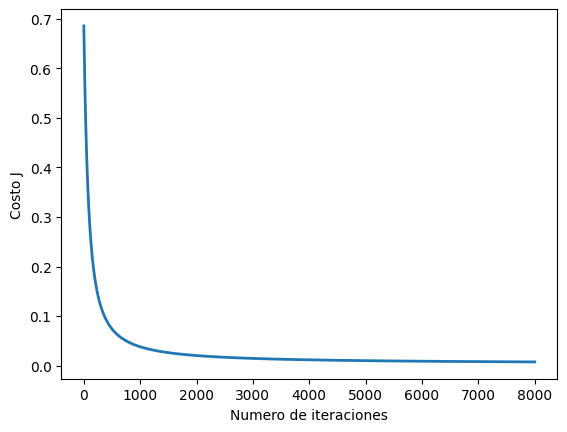

In [94]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.03
num_iters = 8000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(31)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 1.67123000e+05, -4.32071136e-01,  1.64789522e+00, -1.66936063e+00,-3.49504272e-01,  7.85784725e-01,
           -6.30646714e-01,  2.76990104e-01, 5.86024545e-01, -4.84715183e-01, -1.37664827e+00, -1.32833549e+00,
           2.23620681e-01,  1.13262704e+00, -5.50875407e-01,  6.16567936e-01, 4.97974164e-01,  5.02195472e-01,
           9.81342761e-01,  1.01263969e-01,-2.44633313e-01, 3.58931566e-01, 8.73663217e-01, -1.78641813e-01,
           -1.71707728e-02, -2.07391715e-01, -1.57756437e-01, -2.37385989e-01, 1.93412389e-03,  1.50000000e+00 ]

aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"La transaccion fue fraudalenta o genuina (usando el descenso por el gradiente):{aprueba}")